데이터설명

데이터 출처 : https://www.kaggle.com/datasets/mandysia/obesity-dataset-cleaned-and-data-sinthetic 후처리

데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv

데이터 설명 : 각 환자의 의료정보이다. NObeyesdad를 종속변수로 하는 분류모델을 만드려고 한다.

id: unique id for each row
Gender: sex - male or female
Age: age
Height: height
Weight: weight
family_history_with_overweight: Has a family member suffered or suffers f from overweight? - yes or no
FAVC: Frequent consumption of high caloric food - yes or no
FCVC: Frequency of consumption of vegetables - Never, Sometimes, Always
NCP: Number of main meals - 1, 2, 3, 4
CAEC: Consumption of food between meals - No, Sometimes, Frequently, Always
SMOKE: Do you smoke - yes o no
CH2O: Consumption of water daily - Less than a litter, between 1 and 2 l, more than 2 l
SCC: Calories consumption monitoring - yes or no
FAF: Physical activity frequency - 0, 1 to 2, 2 to 4, 4 to 5
TUE: Time using technology devices - 0 to 2, 3 to 5, >5
CALC: Consumption of alcohol - no, sometimes, frequently, always
MTRANS: Transportation used - automobile, motorbike, bike, public_transportation, walking
BMI: Body mass index

(종속변수)
NObeyesdad: Type of obesity - overweight-level_i, obesity_type_i, obesity_type_ii, obesity_type_iii

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv')
df

Unnamed: 0     id  Gender  Age    Height  Weight  \
0              0      4    male   27  1.800000      87   
1              1     11    male   26  1.850000     105   
2              2     14    male   41  1.800000      99   
3              3     18  female   29  1.530000      78   
4              4     20  female   23  1.650000      70   
...          ...    ...     ...  ...       ...     ...   
1257        1257  2,107  female   21  1.710730     131   
1258        1258  2,108  female   22  1.748584     134   
1259        1259  2,109  female   23  1.752206     134   
1260        1260  2,110  female   24  1.739450     133   
1261        1261  2,111  female   24  1.738836     133   

     family_history_with_overweight FAVC       FCVC  NCP        CAEC SMOKE  \
0                                no   no     always    3   sometimes    no   
1                               yes  yes     always    3  frequently    no   
2                                no  yes  sometimes    3   sometimes    no   
3                                no  yes  sometimes    1   sometimes    no   
4                               yes   no  sometimes    1   sometimes    no   
...                             ...  ...        ...  ...         ...   ...   
1257                            yes  yes     always    3   sometimes    no   
1258                            yes  yes     always    3   sometimes    no   
1259                            yes  yes     always    3   sometimes    no   
1260                            yes  yes     always    3   sometimes    no   
1261                            yes  yes     always    3   sometimes    no   

                   CH2O SCC     FAF     TUE        CALC  \
0     between 1 and 2 l  no  2 to 4  0 to 2  frequently   
1         more than 2 l  no  2 to 4      >5   sometimes   
2     between 1 and 2 l  no  2 to 4  3 to 5  frequently   
3     between 1 and 2 l  no       0  0 to 2          no   
4     between 1 and 2 l  no       0  0 to 2   sometimes   
...                 ...  ..     ...     ...         ...   
1257  between 1 and 2 l  no  2 to 4  3 to 5   sometimes   
1258  between 1 and 2 l  no  1 to 2  3 to 5   sometimes   
1259  between 1 and 2 l  no  1 to 2  3 to 5   sometimes   
1260      more than 2 l  no  1 to 2  3 to 5   sometimes   
1261      more than 2 l  no  1 to 2  3 to 5   sometimes   

                     MTRANS          NObeyesdad        BMI  
0                   walking  overweight_level_i  26.851852  
1     public_transportation      obesity_type_i  30.679328  
2                automobile      obesity_type_i  30.555556  
3                automobile      obesity_type_i  33.320518  
4     public_transportation  overweight_level_i  25.711662  
...                     ...                 ...        ...  
1257  public_transportation    obesity_type_iii  44.901475  
1258  public_transportation    obesity_type_iii  43.741923  
1259  public_transportation    obesity_type_iii  43.543817  
1260  public_transportation    obesity_type_iii  44.071535  
1261  public_transportation    obesity_type_iii  44.144338  

[1262 rows x 20 columns]

1-1 EDA & 결측치 및 이상치를 판단하고 처리하라 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1262 non-null   int64  
 1   id                              1262 non-null   object 
 2   Gender                          1262 non-null   object 
 3   Age                             1262 non-null   int64  
 4   Height                          1262 non-null   float64
 5   Weight                          1262 non-null   int64  
 6   family_history_with_overweight  1262 non-null   object 
 7   FAVC                            1262 non-null   object 
 8   FCVC                            1262 non-null   object 
 9   NCP                             1262 non-null   int64  
 10  CAEC                            1262 non-null   object 
 11  SMOKE                           1262 non-null   object 
 12  CH2O                            12

In [6]:
df.describe()

Unnamed: 0          Age       Height       Weight          NCP  \
count  1262.000000  1262.000000  1262.000000  1262.000000  1262.000000   
mean    630.500000    25.749604     1.709184   101.083201     2.665610   
std     364.452329     9.898088     0.091361    21.520848     0.757143   
min       0.000000    15.000000     1.450000    53.000000     1.000000   
25%     315.250000    21.000000     1.631576    82.000000     3.000000   
50%     630.500000    24.000000     1.711095   105.000000     3.000000   
75%     945.750000    27.000000     1.775768   116.000000     3.000000   
max    1261.000000   150.000000     1.980000   173.000000     4.000000   

               BMI  
count  1262.000000  
mean     34.439463  
std       6.106623  
min      22.826739  
25%      30.725995  
50%      34.332001  
75%      38.920119  
max      50.811753

In [9]:
df.isna().sum()

Unnamed: 0                        0
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               3
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64

In [11]:
df['SCC'].value_counts()

no     1219
yes      40
Name: SCC, dtype: int64

In [12]:
df['NObeyesdad'].value_counts()

obesity_type_i        351
obesity_type_iii      324
obesity_type_ii       297
overweight_level_i    290
Name: NObeyesdad, dtype: int64

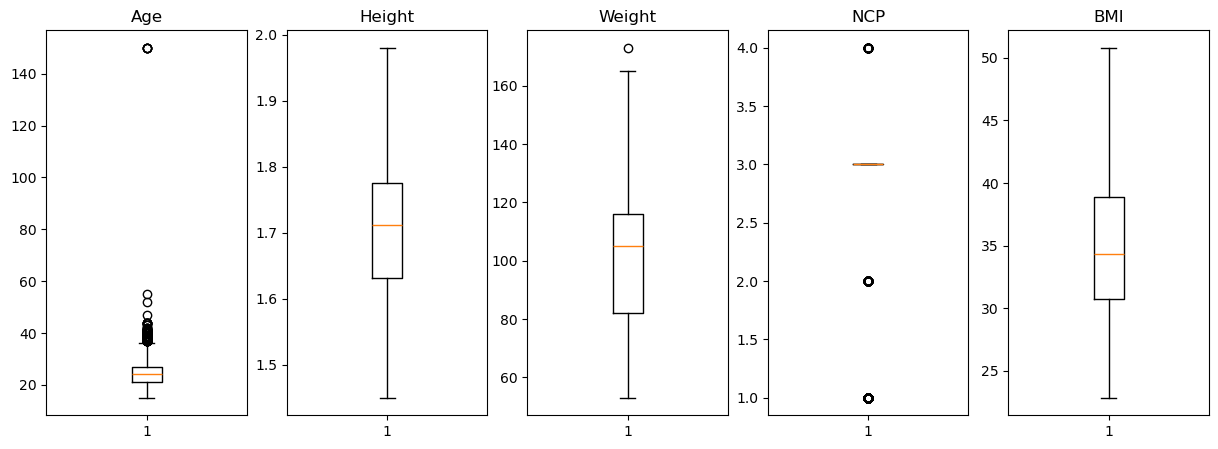

In [26]:
num_x = ["Age","Height","Weight","NCP","BMI"]
plt.figure(figsize=(15,5))
for idx,n_feature in enumerate(num_x):
    plt.subplot(1,len(num_x),idx+1)
    plt.title(n_feature)
    plt.boxplot(df[n_feature])
plt.show()

- 결측치는 SCC에 3개 존재한다. SCC는 yes,no로 구성된 범주형 변수이며, 결측치 처리 방법으로는 변수의 값을 평균 등의 대표값을 넣는 것과 해당 데이터를 제거하는 방법이 있다. 데이터의 분포를 보았을 때 SCC변수는 대부분 no가 들어가는 불균형 데이터로 과반수 차지하고 있고 종속변수의 값은 클래스별로 균등하게 분포되어 있다. 결측치의 개수가 매우 적은 비율임을 감안하여 해당하는 결측치는 제거 하도록 한다.
- 이상치는 수치형 데이터들에 대해 박스플롯으로 시각화를 하였다. 이상치라고 생각해볼만한 변수는 Age가 있는데 140세가 넘는다는 정보가 일반적인 경우는 아니지만 제거하는데 있어서는 명확한 기준이 없기 때문에 제거하지 않는다. 

1-2 데이터 전처리 기법 2가지를 설명하고 주어진 데이터에 적용시 어떤 효과가 있는지 설명하라

In [ ]:
# ? 데이터 전처리 기법 2가지는 

1-3 피쳐 엔지니어링을 통해 파생변수 1개를 생성하고 그 이유를 말하라

2-1 앙상블을 제외한 분류 모델 3가지 구축 및 결과 비교 및 설명하라

2-2 2-1에서 사용한 모델 중 하나를 골라 그리드 서치를 통해서 파라미터 튜닝 및 분류 모델 성능 평가 (precision ,recall)

2-3 2-1의 3가지 모델을 soft voting을 이용하여 모델링 한 결과와 2-2과 비교하라

3-1 하나의 모델을 선정하여 Drop Column Importance 방식으로 각 변수 별로 전체 컬럼을 포함한 모델과의 recall 값의 차이를 계산하고 시각화 하라

데이터 설명
데이터 출처 : 자체제작
데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv
데이터 설명 : 중고등학생 건강검진 데이터

4-1

아래의 기준으로 전처리를 하여 적정 체중 여부 컬럼을 생성하고 BMI를 5단위로 구분하여 와 적정 체중여부에 대한 빈도 표를 만들어라

- bmi 계산 - Bmi = 몸무게(kg)/(키(m)**2)
- 만나이 구하기 - 건강검진을 받았던 날을 기준으로 생년월일과 일수 차이가 16년 364일 이하인 경우 만 16세 그 이상의 경우 만 17로 분류하라 - 윤년 등은
고려하지 않는다. 햇수로 16년 + 일수로 364일이 기준이다
- 적정 체중 여부 (BMI가 아래 구간에 들어올 경우)
17세 남자 : 21.03이상 23.21 미만
17세 여자 : 20.03이상 22.39 미만
16세 남자 : 21.18이상 23.45 미만
16세 여자 : 19.61이상 21.74 미만

4-2

4-1에서 구한 적정 체중 여부와 나머지 컬럼(공학여부, 아침식사여부, 일주일운동시간, 채소섭취정도, 수면시간, 성별) 이 독립적인지 통계적으로 확인하라

4-3 4-2에서 유의한 변수들만 가지고 적정 체중 여부를 예측하는 모델을 구현하고 성능 평가 및 해석을 하라 (로지스틱회귀 ,xgb)
로지스틱회귀 모델은 오즈비를 구하라 xgb의 경우 각 피쳐중요도를 확인하고 예측에 영향을 가장 미치는 변수를 확인하라

4-4 4-3 두 모델의 roc-auc 그래프를 하나의 그래프에 겹쳐 그려라

In [ ]:
5 평균이 𝜃이고 분산이 100인 정규분포의 사전분포가 100, 256일때 120의 값을 가지는 데이터가 있을 경우 사후평균은?

In [ ]:
데이터 설명
데이터 출처 : https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset 후처리
데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv
데이터 설명 : TV, Radio, Newspaper에 각각 광고비(달러)를 다르게 했을때 매출액 (Sales , 밀리언달러)를 나타내는 데이터
종속변수 : Sales

In [ ]:
6-1 회귀 모델링 후 유의하지 않는변수 파악

In [ ]:
6-2 변수 선택시 먼저 제거 될 변수 및 근거 제시

In [ ]:
6-3 VIF를 통한 다중공선성 진단

In [ ]:
7 
데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv
데이터 설명 : A,B,C,D,E 영업사원의 각 계약 성사 유무 (1:계약 , 0:미계약) 를 나타낸 데이터이다. 영업사원의 평균 계약 성사 건수는 같은지 통계 검정하라

In [ ]:
8 유기견이 하루에 2.2마리 발생한다.

In [ ]:
8-1 한마리도 한 버려질 확률

In [ ]:
8-2 적어도 2마리가 버려질 확률